In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer

In [10]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset('penguins')

display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


None

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

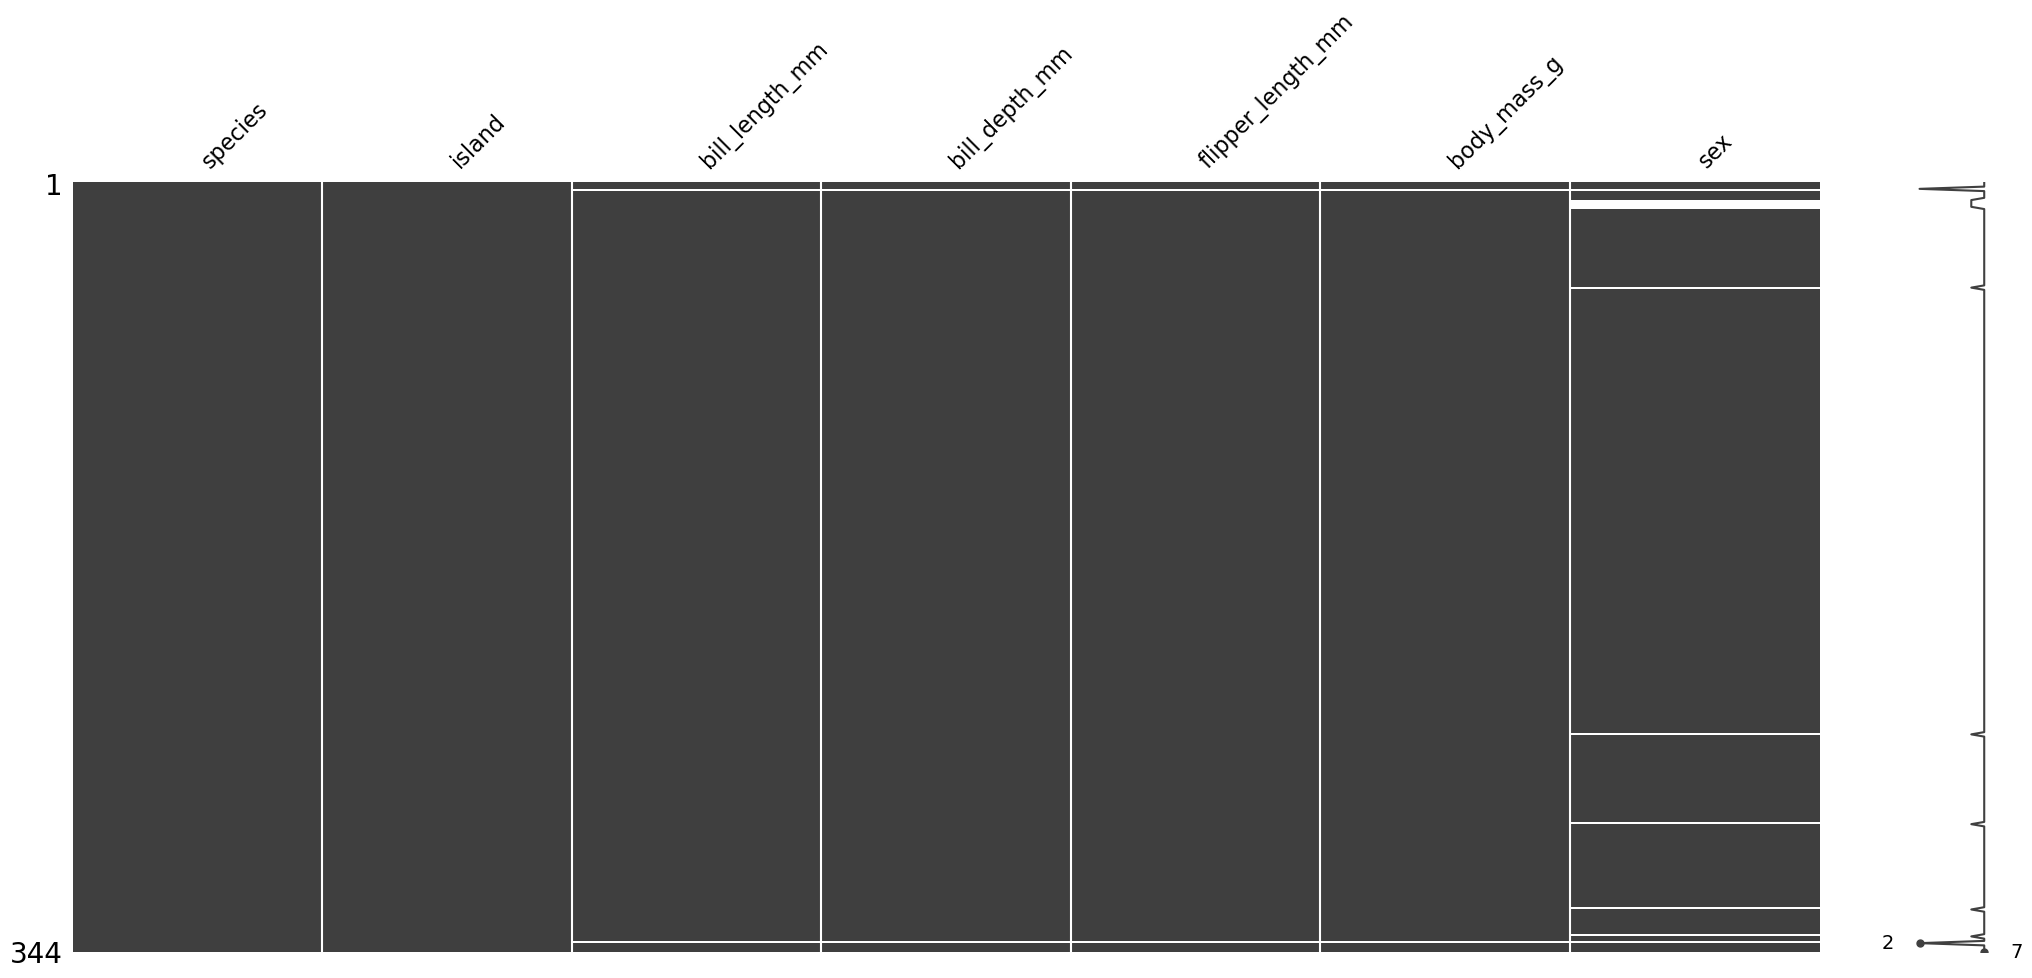

In [18]:
display(df.isnull().sum())

import missingno as msno
msno.matrix(df)
plt.show()

df['sex'] = df['sex'].fillna('unknown')
df = df.dropna(subset=['bill_length_mm', 'bill_depth_mm'])

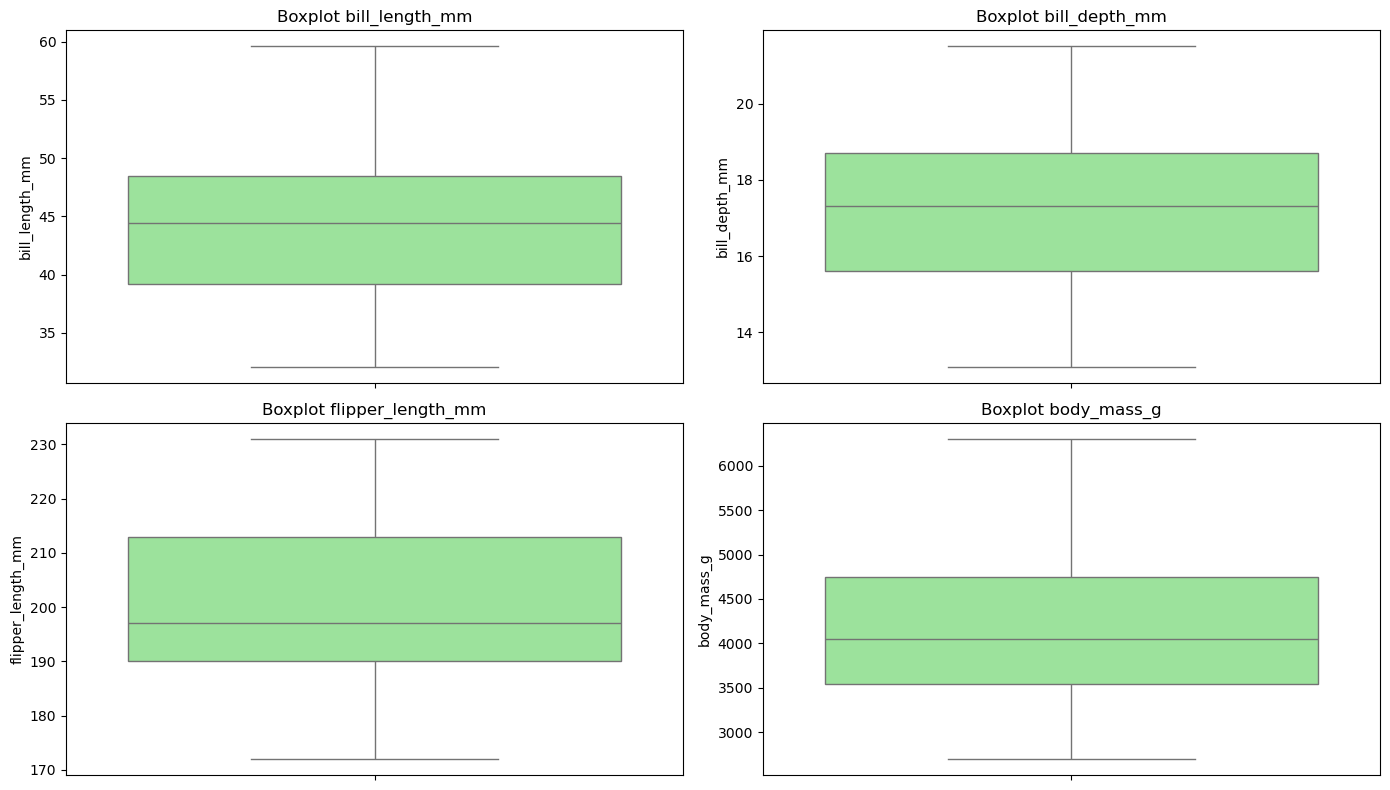

In [20]:
numerical = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical):
    plt.subplot(2, 2, i+1)
    sns.boxplot(data=df, y=col, color='lightgreen')
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

from scipy import stats
df = df[(np.abs(stats.zscore(df[numerical])) < 3).all(axis=1)] 

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])
display(df[numerical].describe())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,3.420000e+02,3.420000e+02,3.420000e+02,3.420000e+02
mean,1.662088e-16,-1.412775e-15,-8.310441e-16,4.155221e-17
std,1.001465e+00,1.001465e+00,1.001465e+00,1.001465e+00
min,-2.168526e+00,-2.054446e+00,-2.059320e+00,-1.875362e+00
25%,-8.615697e-01,-7.866355e-01,-7.773731e-01,-8.138982e-01
50%,9.686524e-02,7.547549e-02,-2.788381e-01,-1.895079e-01
75%,8.397670e-01,7.854492e-01,8.606705e-01,6.846384e-01
max,2.875868e+00,2.205397e+00,2.142618e+00,2.620248e+00


In [24]:
from sklearn.preprocessing import LabelEncoder

In [26]:
display(df['species'].unique())
display(df['island'].unique())
display(df['sex'].unique())

df_encoded = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True)
display(df_encoded.head())

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

array(['Male', 'Female', 'unknown'], dtype=object)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_Male,sex_unknown
0,-0.884499,0.785449,-1.418347,-0.564142,False,False,False,True,True,False
1,-0.811126,0.126188,-1.062250,-0.501703,False,False,False,True,False,False
2,-0.664380,0.430462,-0.421277,-1.188532,False,False,False,True,False,False
4,-1.324737,1.089724,-0.563715,-0.938776,False,False,False,True,False,False
5,-0.847812,1.748985,-0.777373,-0.689020,False,False,False,True,True,False


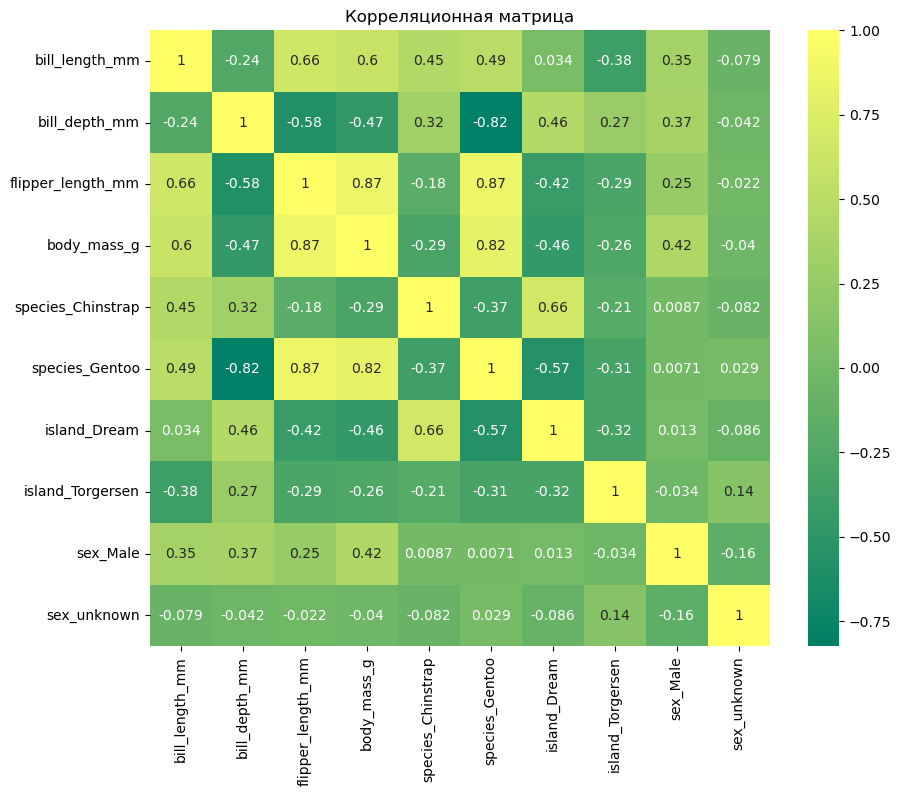

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='summer', )
plt.title('Корреляционная матрица')
plt.show()

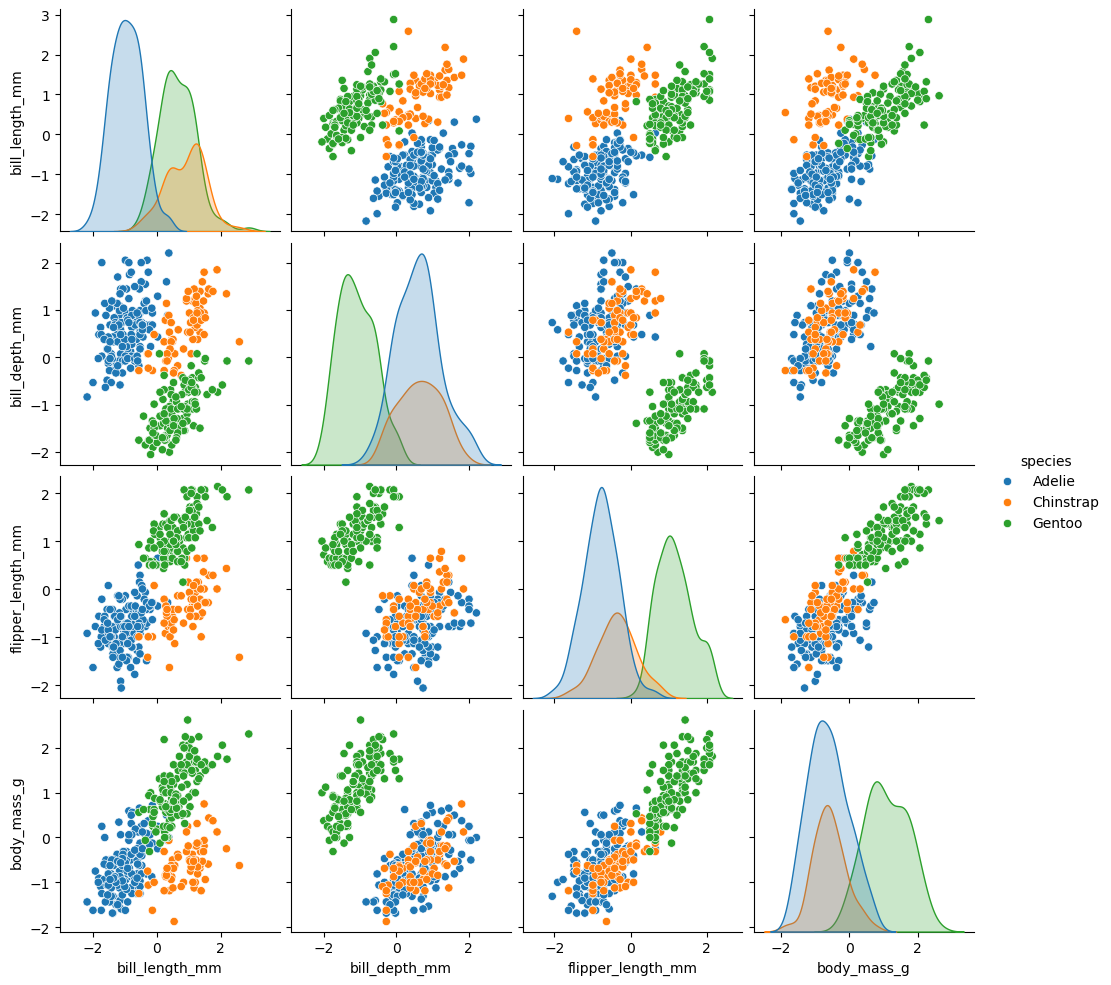

In [30]:
sns.pairplot(df, hue='species')
plt.show()

In [ ]:
df_encoded.to_csv('processed_penguins.csv', index=False)
df_encoded.to_parquet('processed_penguins.parquet', index=False)